Data Exploration and Dimensionality Reduction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from matplotlib.colors import ListedColormap


RSEED = 8


In [ ]:
#Reading the file
data = pd.read_csv(r'C:\Users\Nataqi\Repo_1\datasets\diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


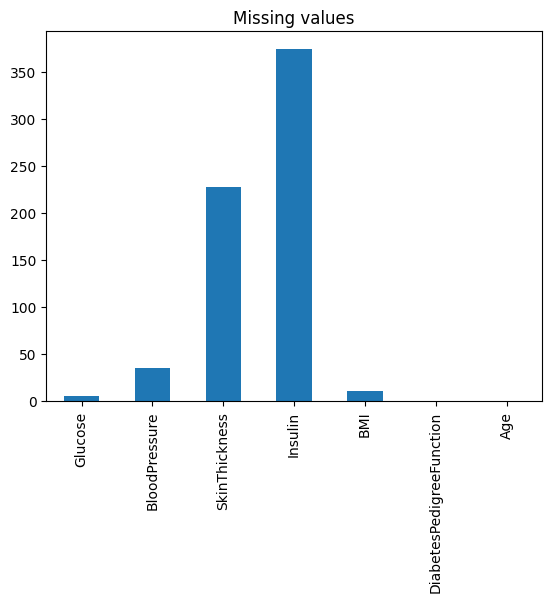

In [ ]:
# missing values per attribute

data_dropped = data.drop(['Pregnancies','Outcome'],axis = 1)
s1 = (data_dropped==0).sum()
s1.plot(kind = 'bar', title = 'Missing values');

In [ ]:
#Impute
data_imputed = data.copy()
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' ,'DiabetesPedigreeFunction','Age']
df_part = data[columns]
df_part.replace(to_replace=0, value = np.nan, inplace = True)
imputer = SimpleImputer(strategy = 'mean')
df_part = imputer.fit_transform(df_part)
df_converted = pd.DataFrame(data = df_part, columns = columns)
data_imputed[columns] = df_converted


C:\Users\Nataqi\AppData\Local\Temp\ipykernel_10592\683452107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.replace(to_replace=0, value = np.nan, inplace = True)


In [8]:
imputer.statistics_

array([121.68676278,  72.40518417,  29.15341959, 155.54822335,
        32.45746367,   0.4718763 ,  33.24088542])

In [9]:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Impute no sklearn
def imputation(df, columns_to_imputed):
    data_imputed_2 = df.copy()
    data_imputed_2.replace(to_replace = 0, value = np.nan, inplace = True)
    data_imputed_2.fillna(value = data_imputed.mean(), inplace = True)
    df = df.copy()
    df[columns_to_imputed] = data_imputed_2[columns_to_imputed]

    return df
    

In [11]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
diabetes_1 = imputation(data, columns)



In [13]:
diabetes_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


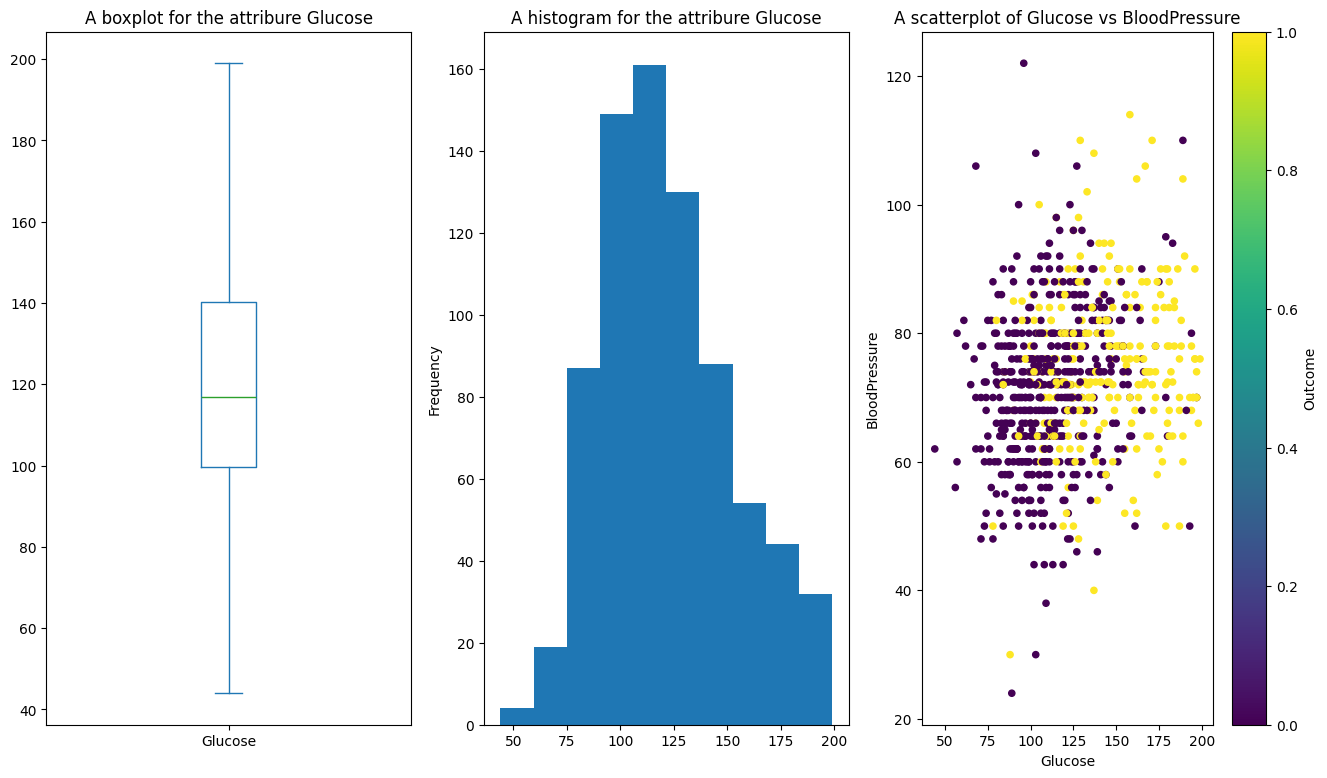

In [ ]:
#Glucose plot
fig, ax = plt.subplots(1, 3, figsize=(16,9)) 

data_imputed['Glucose'].plot(kind = 'box', title = 'A boxplot for the attribure Glucose', ax = ax[0])

data_imputed['Glucose'].plot(kind = 'hist',title='A histogram for the attribure Glucose', ax = ax[1])

data_imputed.plot(kind = 'scatter',title='A scatterplot of Glucose vs BloodPressure', x = 'Glucose', y = 'BloodPressure', c = 'Outcome',colormap='viridis', ax = ax[2]);




C:\Users\Nataqi\AppData\Local\Temp\ipykernel_10592\2638039022.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_class= data_imputed.groupby('age_bins')['Outcome'].value_counts()


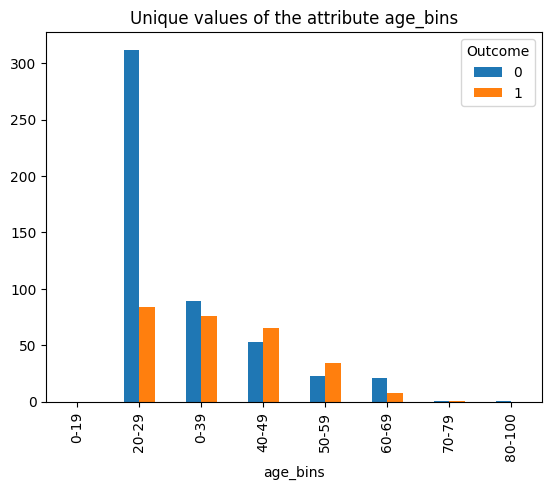

In [ ]:

#Age by class

data_imputed['age_bins'] = pd.cut(data_imputed['Age'], bins = [0, 19, 29, 39, 49, 59, 69, 79, 100], labels = ['0-19', '20-29', '0-39','40-49','50-59','60-69','70-79','80-100'],include_lowest = True )

age_by_class= data_imputed.groupby('age_bins')['Outcome'].value_counts()

age_by_class.unstack().plot(kind = 'bar', title = 'Unique values of the attribute age_bins');

data_imputed.drop('age_bins', axis = 1, inplace = True)

In [ ]:
#Standartization

y = pd.Series(data_imputed['Outcome']) 
data_imputed_dropped = data_imputed.drop(columns = 'Outcome') 
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_imputed_dropped))
data_standardized.set_axis(['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' ,'DiabetesPedigreeFunction','Age'],axis = 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732


In [ ]:
#Dimensionality Reduction, PCA
pca = PCA(n_components=2, random_state = 8)
pca.fit(data_standardized)
explained_variance_ratio = pca.explained_variance_ratio_ 
df_principal_components = pd.DataFrame(pca.components_ )
df_principal_components

,0,1,2,3,4,5,6,7
0,0.308371,0.421065,0.378498,0.390485,0.320583,0.390827,0.146564,0.393539
1,-0.552069,0.068170,-0.139202,0.347245,0.152909,0.437935,0.271494,-0.511603


In [22]:
explained_variance_ratio

array([0.28750131, 0.18411087])

In [ ]:
# contribute the most
attribute_contributing_the_most =  "Glucose"

C:\Users\Nataqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


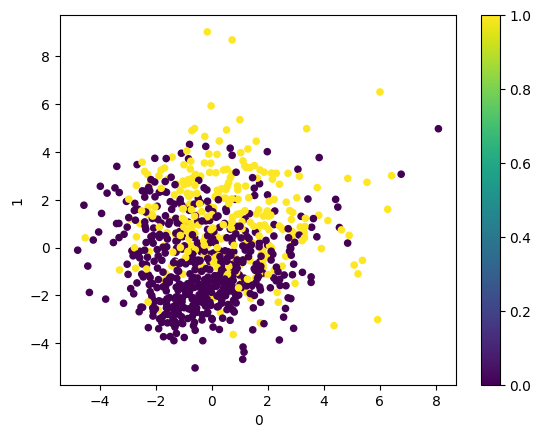

In [ ]:
#Multi-dimensional scaling
mds_1 = MDS(n_components = 2, dissimilarity='euclidean', random_state=8)
X_2d_a = mds_1.fit_transform(data_standardized)

pd.DataFrame(X_2d_a).plot(kind = 'scatter', x = 0, y = 1, c = data_imputed['Outcome'], colormap='viridis');

In [29]:
X_2d_a

array([[-0.12285467,  1.79329716],
       [-0.48300902, -1.50671556],
       [-2.5678784 ,  1.00016869],
       ...,
       [-1.07935283, -0.61273767],
       [-0.85726751, -0.16667644],
       [ 0.26995829, -1.3868661 ]])

C:\Users\Nataqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


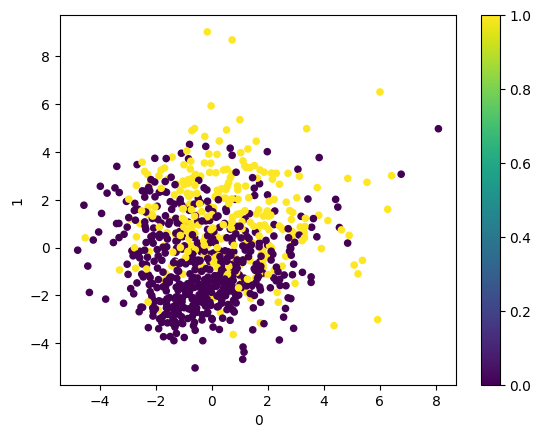

In [ ]:
# pairwise distances between observations using the euclidean metric
from scipy.spatial.distance import pdist, squareform

square_distance_matrix = squareform(pdist(data_standardized,metric='euclidean' ))

mds_2 = MDS(n_components = 2, dissimilarity='precomputed', random_state=8)
X_2d_b = mds_2.fit_transform(square_distance_matrix)

pd.DataFrame(X_2d_b).plot(kind = 'scatter', x = 0, y = 1, c = data_imputed['Outcome'], colormap='viridis');